## Mini-Project for Programming Course - PSE
By Meng JIANG

Dear Professors, 

My mini-project explores the latitudinal disparity in global warming trends, with a particular focus on the Arctic Zone.

- If you **arrived here first**, I invite you to **start with streamlit**. 
- If you have **arrived here after checking streamlit**, I invite you to **scroll down to the Data Analysis Section**. 

This notebook is divided into two parts. The first part focuses on data visualization, where I generated interactive plots and maps using Streamlit to demonstrate the findings. The second part includes a simple data analysis, in which two models were tested to map the growth of accumulated temperature in the Arctic Zone.

Hope you enjoy the read. Have a nice day.  

Best,
Meng


In [ ]:
%matplotlib inline

In [3]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from streamlit_folium import folium_static
from branca.colormap import linear
import cmocean
import matplotlib.colors as mcolors

2025-02-25 22:05:45.254 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


### Steamlit Code Section begins here 
Please Check Data Analysis below

In [ ]:
# Use the 'balance' colormap from cmocean
cmap = cmocean.cm.balance

In [ ]:
# Page configuration
st.set_page_config(
    page_title="Exploring Latitudinal Variations in Temperature Growth Over Time",
    page_icon="🌍",
    layout="wide",
    initial_sidebar_state="expanded"
)

In [ ]:
# Title and introduction
st.title("Mini-Project for Programming Course - PSE")
st.markdown("**By Meng JIANG**")

st.markdown("<h3 style='color:steelblue;'>Data</h3>", unsafe_allow_html=True)

st.write("1. Exploring 'Zonal Annual Means' Data")

st.write("The 'Zonal Annual Means' data available on NASA's website (https://data.giss.nasa.gov/gistemp/) refers to a dataset that provides average values of temperature, calculated over a year and averaged across different latitudinal zones (zonal means).")

In [5]:
# Load the dataset
df = pd.read_csv("ZonAnn.Ts+dSST.csv")

In [ ]:
st.write("Data download here(https://data.giss.nasa.gov/gistemp/tabledata_v4/T_AIRS/ZonAnn.Ts+dSST.csv).")

In [ ]:
# Optional: Expandable section to display the first five lines of the data
with st.expander("👉 Expand here to see the first five lines of the data"):
    st.write("First Five Lines of the Data")
    st.write(df.head())

In [ ]:
# Key Features section
st.write("2. Data Key Features")
st.write("The variables measured are temperature in different latitudinal zones.")
st.markdown("- **Annual Averages**: The values provided are annual averages, meaning they are calculated by averaging data points over an entire year. This helps to smooth out seasonal variations and provide a clearer picture of long-term trends.")
st.markdown("- **Anomalised Data**: NASA's zonal annual means use anomalised data, which represents deviations from a long-term average, or baseline, rather than absolute values. This approach removes regional biases, highlights trends, and allows for consistent comparisons across different areas and time periods. *In this exercise, I use 'anomalised temperature' and 'temperature' interchangably*.")
st.markdown("- **Latitudinal Zones**: The values for each variable represent the average temperature for that specific latitudinal band or region for a given year.")

In [ ]:
# Table explaining the variables
with st.expander("👉Expand here to see the table explaining the variables"):
    st.write("Variable Descriptions")
    variables = {
        "Variable Index": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
        "Variable Name": [
            "Year", "Glob", "NHem", "SHem", "24N-90N", "24S-24N", "90S-24S", "64N-90N", 
            "44N-64N", "24N-44N", "EQU-24N", "24S-EQU", "44S-24S", "64S-44S", "90S-64S"
        ],
        "Description": [
            "The year for which the data is reported.",
            "Global average of the parameter (averaged over the entire Earth).",
            "Northern Hemisphere average of the parameter (averaged from 0°N to 90°N).",
            "Southern Hemisphere average of the parameter (averaged from 0°S to 90°S).",
            "Average of the parameter for the latitudinal band from 24°N to 90°N.",
            "Average of the parameter for the latitudinal band from 24°S to 24°N. Covers the tropics and subtropics, including the equatorial region.",
            "Average of the parameter for the latitudinal band from 90°S to 24°S.",
            "Average of the parameter for the latitudinal band from 64°N to 90°N. Focuses on the Arctic Circle and polar regions in the Northern Hemisphere.",
            "Average of the parameter for the latitudinal band from 44°N to 64°N. Covers the mid-latitudes in the Northern Hemisphere, including temperate regions.",
            "Average of the parameter for the latitudinal band from 24°N to 44°N. Covers the subtropical and warm temperate regions in the Northern Hemisphere.",
            "Average of the parameter for the latitudinal band from the Equator (0°) to 24°N. Focuses on the northern tropics, from the equator to 24°N.",
            "Average of the parameter for the latitudinal band from 24°S to the Equator (0°). Focuses on the southern tropics, from 24°S to the equator.",
            "Average of the parameter for the latitudinal band from 44°S to 24°S. Covers the subtropical and warm temperate regions in the Southern Hemisphere.",
            "Average of the parameter for the latitudinal band from 64°S to 44°S. Covers the mid-latitudes in the Southern Hemisphere, including temperate regions.",
            "Average of the parameter for the latitudinal band from 90°S to 64°S. Focuses on the Antarctic Circle and polar regions in the Southern Hemisphere."
        ]
    }
    variables_df = pd.DataFrame(variables)
    st.table(variables_df)

In [ ]:
### **Introduction**
st.markdown("<h3 style='color:steelblue;'>Introduction</h3>", unsafe_allow_html=True)
st.write("Climate change is one of the most pressing challenges of the 21st century, with rising global temperatures posing significant risks to ecosystems, economies, and human societies. While the Earth's climate system is complex and interconnected, **the impacts of global warming are not uniformly distributed across the planet**. Latitudinal variations in temperature growth reveal critical insights into how different regions are responding to climate change.")
st.write("This exercise focuses on analysing temperature growth trends across various latitudinal zones over the past 145 years (1880-now), with particular emphasis on the Arctic region. Spanning latitudes from 64°N to 90°N, the Arctic is one of the most rapidly changing environments on Earth. Over the past few decades, it has experienced warming at a rate nearly twice the global average — a phenomenon known as **Arctic amplification**. This accelerated warming is driven by a combination of feedback mechanisms, including the reduction of sea ice, which decreases surface albedo (reflectivity), and the release of greenhouse gases from thawing permafrost. These changes have profound implications for global climate systems, sea level rise, and Arctic ecosystems.")
st.write("By plotting and visualising these trends, I aim to highlight the stark contrast between Arctic warming and global temperature increases, providing a clear illustration of Arctic amplification. Using anomalised temperature evolution, growth rates of temperature, and accumulated temperature over time, I will illustrate the magnitude and progression of Arctic warming. This analysis will not only deepen our understanding of Arctic amplification but also underscore its significance in the broader context of global climate change.")



##########################################################
######## Exploring Anomalised Temperature Trends #########
##########################################################
st.markdown("<h3 style='color:steelblue;'>Part I: Anomalised Temperature Trends</h3>", unsafe_allow_html=True)
st.write("The graphs below illustrates the temperature trends over time across different latitudinal zones, with a particular focus on the Arctic region.")

st.write("The first graph depicts the temperature trends over time for three large latitudinal zones, which shows deviations from a long-term average, plotted against time from the late 19th century to the early 21st century. The graph reveals a clear upward trend in temperature anomalies across the globe, indicating a general warming trend over the past century. However, the rate and magnitude of warming vary between the zones.")

st.write("From the second graph, which focuses on the Northern Hemisphere, it is evident that the Northern Polar Zone shows a more pronounced increase in temperature anomalies over time compared to the other zones. This trend becomes particularly noticeable from the mid-20th century onwards, with a sharp rise in temperature anomalies in the Arctic region. In contrast, the Northern Temperate, Subtropical, and Tropical Zones exhibit relatively moderate increases in temperature anomalies, with the Tropical Zone showing the least variation.")

st.write("The comparison underscores the phenomenon of Arctic amplification, where the Arctic is warming at a rate significantly higher than the global average. These graphs provides a clear and compelling illustration of the disproportionate warming in the Arctic compared to other latitudinal zones.")

In [ ]:
col1, col2 = st.columns([1, 1])

# First graph: 
with col1:
    st.write("<p style='font-size: 12px;'>Three Large Latitudinal Zones Temperature Trends Comparison Over Time</p>", unsafe_allow_html=True)
    fig1_1, ax1_1 = plt.subplots(figsize=(8, 5))
    ax1_1.plot(df['Year'], df['24N-90N'], label='Northern Extratropics Zone', marker='o', ms=1)
    ax1_1.plot(df['Year'], df['24S-24N'], label='Tropical and Subtropical Zone', marker='o', ms=1)
    ax1_1.plot(df['Year'], df['90S-24S'], label='Southern Extratropics Zone', marker='o', ms=1)
    ax1_1.set_title('Latitudinal Zones Comparison Over Time')
    ax1_1.set_xlabel('Year')
    ax1_1.set_ylabel('Yearly Average Temperature')
    ax1_1.grid(True, linestyle='--', alpha=0.7)
    ax1_1.legend()
    st.pyplot(fig1_1)

# Second graph: 
with col2:
    st.write("<p style='font-size: 12px;'>Zones in North Hemisphere Temperature Trends Comparison Over Time</p>", unsafe_allow_html=True)
    fig1_2, ax1_2 = plt.subplots(figsize=(8, 5))
    ax1_2.plot(df['Year'], df['64N-90N'], label='Northern Polar Zone', marker='o', ms=1)
    ax1_2.plot(df['Year'], df['44N-64N'], label='Northern Temperate Zone', marker='o', ms=1)
    ax1_2.plot(df['Year'], df['24N-44N'], label='Northern Subtropical Zone', marker='o', ms=1)
    ax1_2.plot(df['Year'], df['EQU-24N'], label='Northern Tropical Zone', marker='o', ms=1)
    ax1_2.set_title('North Hemisphere Comparison Over Time')
    ax1_2.set_xlabel('Year')
    ax1_2.set_ylabel('Yearly Average Temperature')
    ax1_2.grid(True, linestyle='--', alpha=0.7)
    ax1_2.legend()
    st.pyplot(fig1_2)

In [ ]:
## Plotting interactive plot for muiltple trends
#Create the side bar 
st.write('<p style="color: lightblue; font-weight: bold;"> 📈⚙️ Multi-Zones Temperature Trends Comparison Over Time</p>', unsafe_allow_html=True)
selected_columns = st.multiselect(
    "✨Select muiltple latitudinal zones to comapre temperature trends between various latitudinal zones",
    df.columns[1:].tolist(),  # Convert Index to a list
    default=["Glob", "90S-64S", "64N-90N"]
)
# Create the figure for multiple trends
if selected_columns: 
    fig2, ax2 = plt.subplots(figsize=(10, 6))   
    for col in selected_columns:
        ax2.plot(df['Year'], df[col], label=col)
    ax2.set_title("Various Latitudinal Zones Temperature Trends Comparison Over Time")
    ax2.set_xlabel("Year")
    ax2.set_ylabel("Temperature")
    ax2.legend()
    st.pyplot(fig2) 
else:
    st.warning("You must select at least one latitudinal zone for comparison.")

In [ ]:
st.write("The graph above presents a comparison of the gobal average temperature trend to the trends of two distinct latitudinal zones: 90S-64S (Southern Polar Zone) and 64N-90N (Northern Polar Zone).")

st.write("The default graph shows that both the Southern and Northern Polar Zones exhibit an overall increase in temperature anomalies over time, indicating a warming trend. However, the Northern Polar Zone (64N-90N) demonstrates a more pronounced and rapid increase in temperature anomalies compared to the Southern Polar Zone (90S-64S). Again, this is particularly evident from the mid-20th century onwards, where the Northern Polar Zone's temperature anomalies rise sharply, reflecting the phenomenon of Arctic amplification.")

In [ ]:
## Optional: Plotting interactive plot for single trend
with st.expander("✨ (Bonus) Expand here to plot single latitudinal zone temperature evolution"):
    #Create the side bar 
    st.write('<p style="color: lightblue; font-weight: bold;"> 📈⚙️ Single Latitudinal Zone Temperature Evolution</p>', unsafe_allow_html=True)
    selected_column = st.selectbox("✨Select a latitudinal zone to plot single trend", df.columns[1:])
    # Create the figure for the plot
    fig3, ax3 = plt.subplots(figsize=(10, 6))
    ax3.plot(df['Year'], df[selected_column])
    ax3.set_title(f"{selected_column} over Time")
    ax3.set_xlabel("Year")
    ax3.set_ylabel("Temperature")
    st.pyplot(fig3)  



##################################################################
######### Exploring Trends for The Growth of Temperature #########
##################################################################
st.markdown("<h3 style='color:steelblue;'>Part II: Temperature Growth Trends</h3>", unsafe_allow_html=True)
st.write("Temperature growth, or the increase in global or regional temperatures over time, is a central metric for understanding climate change. While analysing the evolution of anomalised temperature provides valuable insights into long-term warming trends, examining the **rate of change in temperature for each latitudinal zone per year** offers an additional layer of understanding. The rate of change highlights how quickly temperatures are rising, revealing critical patterns such as acceleration or regional disparities in warming. By plotting the rate of change, we can better visualise the dynamics of global warming, compare its impacts across different regions, and identify areas where mitigation and adaptation efforts are most urgently needed - such as The Arctic.")

In [7]:
# Generate Yearly Temperature Difference
latitudinal_columns = df.columns[1:]  
for col in latitudinal_columns:
    df[f"{col}_diff"] = df[col].diff()

In [ ]:
# Optional: Expandable section to display the first five lines of the data
with st.expander("👉 Expand here to see the first five lines of the data with rate of change "):
    st.write("First Five Lines of the Data")
    diff_columns = [col for col in df.columns if "_diff" in col]
    st.write(df[diff_columns].head())

In [ ]:
# Optional: Expandable section to display the calculation for rate of change
with st.expander("👉 Expand here to see the detailed calculation for rate of change"):

    st.latex(r"""
\text{temp\_diff}(i,t) = \frac{\text{temp}(i,t) - \text{temp}(i,t-1)}{\text{t}(i) - \text{t-1}(i)}
""")
    st.write("Where:")
    st.latex(r"\text{temp}(i,t) \text{ is the average temperature in year } t.")
    st.latex(r"\text{temp}(i,t-1) \text{ is the average temperature in year } t-1.")
    st.latex(r"\text{t}(i) - \text{t-1}(i) \text{ is the time difference in years.}")

In [ ]:
## Exploring Trends Temperature Growth  
st.write('<p style="color: lightblue; font-weight: bold;">Exploring Trends for Temperature Yearly Growth</p>', unsafe_allow_html=True)

st.write("The graphs below illustrate the yearly growth rates of temperature across three large latitudinal zones and the Northern Hemisphere over time, from the late 19th century to the early 21st century. ")
st.write("It is difficult to observe trends visually from the graphs. However, the graphs highlight significant regional disparities in yearly temperature changes across the globe through the variability of yearly temperature changes. In the first graph, it shows that all three trends are relatively flat, while the temperatures in the Southern Extratropics Zone are less volatile compared to the ither two zones. In the second graph, compared to the Northern Polar Zone, the Northern Temperate, Subtropical, and Tropical Zones, as latitude getting lower, exhibit more moderate and stable yearly temperature changes.")

In [ ]:
col1, col2 = st.columns([1, 1])

# First graph: 
with col1:
    st.write("<p style='font-size: 12px;'>Three Large Latitudinal Zones Temperature Growth Trends Comparison Over Time</p>", unsafe_allow_html=True)
    fig4_1, ax4_1 = plt.subplots(figsize=(8, 5))
    ax4_1.plot(df['Year'], df['24N-90N_diff'], label='Northern Extratropics Zone', marker='o', ms=1)
    ax4_1.plot(df['Year'], df['24S-24N_diff'], label='Tropical and Subtropical Zone', marker='o', ms=1)
    ax4_1.plot(df['Year'], df['90S-24S_diff'], label='Southern Extratropics Zone', marker='o', ms=1)
    ax4_1.set_title('Three Large Latitudinal Zones Temperature Growth Comparison Over Time')
    ax4_1.set_xlabel('Year')
    ax4_1.set_ylabel('Yearly Average Temperature Change')
    ax4_1.grid(True, linestyle='--', alpha=0.7)
    ax4_1.legend()
    st.pyplot(fig4_1)

# Second graph: 
with col2:
    st.write("<p style='font-size: 12px;'>Zones in North Hemisphere Temperature Trends Comparison Over Time</p>", unsafe_allow_html=True)
    fig4_2, ax4_2 = plt.subplots(figsize=(8, 5))
    ax4_2.plot(df['Year'], df['64N-90N_diff'], label='Northern Polar Zone', marker='o', ms=1)
    ax4_2.plot(df['Year'], df['44N-64N_diff'], label='Northern Temperate Zone', marker='o', ms=1)
    ax4_2.plot(df['Year'], df['24N-44N_diff'], label='Northern Subtropical Zone', marker='o', ms=1)
    ax4_2.plot(df['Year'], df['EQU-24N_diff'], label='Northern Tropical Zone', marker='o', ms=1)
    ax4_2.set_title('North Hemisphere Temperature Growth Comparison Over Time')
    ax4_2.set_xlabel('Year')
    ax4_2.set_ylabel('Yearly Average Temperature Change')
    ax4_2.grid(True, linestyle='--', alpha=0.7)
    ax4_2.legend()
    st.pyplot(fig4_2)

In [ ]:
## Plotting interactive plot for muiltple trends
#Create the side bar 
st.write('<p style="color: lightblue; font-weight: bold;">📈⚙️ Multi-Zones Temperature Growth Trends Comparison Over Time</p>', unsafe_allow_html=True)
selected_columns = st.multiselect(
    "✨Select latitudinal zones to compare",
    df.columns[1:].tolist(),  
    default=["64N-90N_diff", "90S-64S_diff"]
)
# Create the figure for muiltple trends
if selected_columns: 
    fig5, ax5 = plt.subplots(figsize=(10, 6))
    for col in selected_columns:
        ax5.plot(df['Year'], df[col], label=col)
    ax5.set_title("Various Latitudinal Zones Temperature Growth Comparison Over Time")
    ax5.set_xlabel("Year")
    ax5.set_ylabel("Temperature/Yearly Average Temperature Change")
    ax5.legend()
    st.pyplot(fig5) 
else:
    st.warning("You may select at least one latitudinal zones for comparison.")

In [ ]:
st.write("The graph above allows for the comparison of both temperature trends and temperature growth across different latitudinal zones. The default option specifically focuses on the 64N-90N region (Northern Polar Zone) in comparison to the 90S-64S region (Southern Polar Zone). It appears that between the years 1900 and 1960, the North Pole experienced more volatile temperature changes than the South Pole. After 1960, both polar zones show increased volatility.")



###############################################################
######### Exploring Trends for Accumulated Temperature #########
###############################################################
st.markdown("<h3 style='color:steelblue;'>Part III:Accumulated Temperature</h3>", unsafe_allow_html=True)
st.write("Global warming is often measured through average temperature increases, but another powerful metric for understanding its impact is accumulated temperature. This metric represents the total amount of warming over a specific period, calculated by summing temperature anomalies above a baseline. Unlike average temperature, which smooths out variations, accumulated temperature captures the cumulative effect of warming, providing a clearer picture of long-term trends and their impacts. This approach not only underscores the urgency of addressing Arctic warming but also provides a compelling way to communicate the cumulative impact of global warming to a broader audience.")

In [9]:
# Generate Accumulated Temperature 
diff_columns = [col for col in df.columns if "_diff" in col]
for col in diff_columns:
    df[f"{col.replace('_diff', '_accum')}"] = df[col].cumsum()

In [ ]:
# Optional: Expandable section to display the first five lines of the data
with st.expander("👉 Expand here to see the first five lines of the data of accumulated temperature"):
    st.write("First Five Lines of the Data")
    accum_columns = [col for col in df.columns if col.endswith("_accum")]
    st.write(df[accum_columns].head())

In [ ]:
# Optional: Expandable section to display the calculation for accumulated temperature
with st.expander("👉 Expand here to see the detailed calculation for accumulated temperature"):

    st.latex(r"""
\text{temp\_accum}(i, t) = \sum_{t=0}^{t} \text{temp}(i, t)
""")
    st.write("Where:")
    st.latex(r"\text{temp}(i, t) \text{ is the temperature for latitudinal zone } i \text{ at year } t.")
    st.latex(r"\text{The accumulated temperature at year } t \text{ is the sum of temperatures for that zone from the first year up to year } t.")

## Exploring Accumulated Temperature  
st.write('<p style="color: lightblue; font-weight: bold;">Exploring Accumulated Temperature with an interactive map 🌍</p>', unsafe_allow_html=True)

In [ ]:
# Define the zone accumulation columns
zone_accum_columns = [
    "64N-90N_accum", "44N-64N_accum", "24N-44N_accum", "EQU-24N_accum",
    "24S-EQU_accum", "44S-24S_accum", "64S-44S_accum", "90S-64S_accum"
]

# Define latitudinal bounds for each zone
lat_zones = {
    "64N-90N": (64, 90),
    "44N-64N": (44, 64),
    "24N-44N": (24, 44),
    "EQU-24N": (0, 24),
    "24S-EQU": (-24, 0),
    "44S-24S": (-44, -24),
    "64S-44S": (-64, -44),
    "90S-64S": (-90, -64),
}

# Year selection slider
selected_year = st.slider("Select Year 🔥", int(df["Year"].min()), int(df["Year"].max()), 2024)

# Filter data for the selected year
df_year = df[df["Year"] == selected_year]

# Ensure accumulation columns are numeric and replace NaN with 0.001
df_year[zone_accum_columns] = df_year[zone_accum_columns].apply(pd.to_numeric, errors='coerce').fillna(0.001)

In [ ]:
# Create DataFrame for latitudinal bands
data = []
for zone_col in zone_accum_columns:
    zone = zone_col.replace("_accum", "")
    lat_min, lat_max = lat_zones.get(zone, (0, 0))
    temperature = df_year[zone_col].values[0] if not df_year.empty else 0.001
    data.append({"Zone": zone, "Latitude_Min": lat_min, "Latitude_Max": lat_max, "Temperature": temperature})

df_bands = pd.DataFrame(data)

In [ ]:
# Normalize temperatures to the range [-4, 4]
min_temp = -4  
max_temp = 4   
df_bands["ColorNorm"] = np.clip(df_bands["Temperature"], min_temp, max_temp)  
df_bands["ColorNorm"] = (df_bands["ColorNorm"] - min_temp) / (max_temp - min_temp) 

# Use the 'balance' colormap from cmocean (NASA/NOAA-like)
cmap = cmocean.cm.balance

In [ ]:
# Create the map
fig, ax = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})

# Add map features
ax.add_feature(cfeature.LAND, color="lightgray")
ax.add_feature(cfeature.OCEAN, color="lightblue")
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linestyle=":", linewidth=0.5)

# Draw latitudinal zones
for _, row in df_bands.iterrows():
    lat_min, lat_max = row["Latitude_Min"], row["Latitude_Max"]
    color = cmap(row["ColorNorm"])  
    ax.fill_between(
        x=[-180, 180],  
        y1=lat_min,  
        y2=lat_max,  
        color=color,  
        alpha=0.9,  
        transform=ccrs.PlateCarree(),  
    )

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=min_temp, vmax=max_temp))
sm.set_array([])
plt.colorbar(sm, ax=ax, orientation="horizontal", label="Temperature Variation (°C)")

# Set map extent
ax.set_global()

# Display the map in Streamlit
st.pyplot(fig)

In [ ]:
st.write("As users move forward in time (e.g., towards 2024), the map reveals a significant increase in accumulated temperature around the North Pole. The region shows a pronounced shift towards warmer-than-average temperatures, with large areas consistently displaying positive temperature anomalies. This trend is particularly striking, as the Arctic has warmed by approximately **3°C since the pre-industrial era**, compared to the global average of about **1.1°C**, underscoring the phenomenon of **Arctic amplification**.")

st.write("The rapid growth of accumulated temperature around the North Pole highlights the disproportionate impact of climate change on the Arctic region. Over the decades, the region has transitioned from minimal temperature deviations to exhibiting some of the highest positive anomalies on the map. This accelerated warming is driven by feedback mechanisms such as the loss of reflective sea ice, which has been shrinking at a rate of **12.6% per decade** since the late 1970s, and the thawing of permafrost, which releases significant amounts of methane and carbon dioxide, further exacerbating global warming.")

st.write("The Arctic is a critical region for global warming research, not only because it is warming two to four times faster than the global average but also due to its profound influence on global climate systems. The decline in Arctic sea ice, which reached its **second-lowest extent on record in 2023**, disrupts weather patterns worldwide, contributing to extreme events such as heatwaves, cold snaps, and intensified storms. Recent findings from the **2023 IPCC report** warn that if global temperatures rise by **2°C**, the Arctic could experience ice-free summers as early as the mid-21st century. This would have cascading effects on ecosystems, sea levels, and weather systems globally. The Arctic’s disproportionate warming underscores its dual role as both a barometer and a driver of climate change, emphasizing the urgent need for global action to reduce emissions, mitigate impacts, and protect this vital region to ensure the stability of the planet’s climate system.🌏💪")

## Data Analysis Section

In [ ]:
# Load the dataset
df = pd.read_csv("ZonAnn.Ts+dSST.csv")

In [ ]:
# Generate Yearly Temperature Difference
latitudinal_columns = df.columns[1:]  
for col in latitudinal_columns:
    df[f"{col}_diff"] = df[col].diff()

In [ ]:
# Generate Accumulated Temperature 
diff_columns = [col for col in df.columns if "_diff" in col]
for col in diff_columns:
    df[f"{col.replace('_diff', '_accum')}"] = df[col].cumsum()

In [11]:
df.head()

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,EQU-24N,24S-EQU,44S-24S,64S-44S,90S-64S
0,1880,-0.17,-0.31,-0.04,-0.41,-0.12,-0.01,-0.81,-0.54,-0.31,-0.15,-0.09,-0.03,0.05,0.68
1,1881,-0.09,-0.20,0.01,-0.38,0.11,-0.06,-0.93,-0.51,-0.22,0.10,0.12,-0.04,-0.07,0.61
2,1882,-0.11,-0.23,0.00,-0.33,-0.04,0.02,-1.41,-0.32,-0.15,-0.05,-0.04,0.02,0.04,0.64
3,1883,-0.17,-0.29,-0.06,-0.36,-0.16,0.00,-0.18,-0.60,-0.27,-0.17,-0.14,-0.03,0.07,0.51
4,1884,-0.28,-0.43,-0.14,-0.62,-0.14,-0.13,-1.31,-0.68,-0.46,-0.12,-0.15,-0.18,-0.02,0.66


In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

In [13]:
# Handle NaN values
df["64N-90N_accum"] = df["64N-90N_accum"].fillna(0)  # Fill with 0
X = df[["Year"]]
y = df["64N-90N_accum"]

## Model 1: Quadratic 

In [15]:
# Transform features to include quadratic term
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)

# Fit the quadratic model
model = LinearRegression()
model.fit(X_poly, y)

# Predict using the model
y_pred = model.predict(X_poly)

# Calculate R-squared value
r2 = r2_score(y, y_pred)

# Print model coefficients and R-squared
print("Model Coefficients (a, b, c):", model.coef_, model.intercept_)
print("R-squared:", r2)



Model Coefficients (a, b, c): [-3.58586443e-01  9.68327846e-05] 331.91887683690805
R-squared: 0.6366373952644182


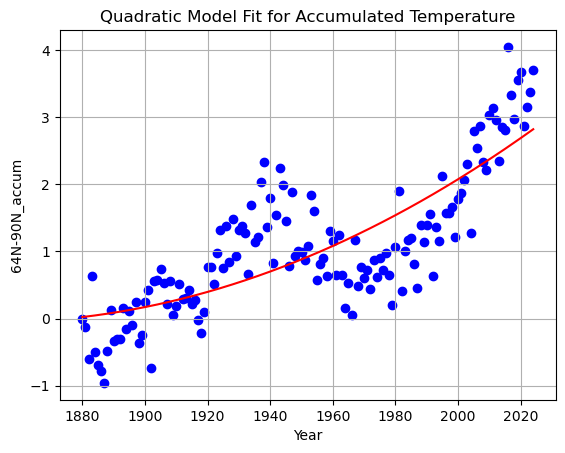

In [17]:

# Plot the original data and fitted curve
plt.scatter(X, y, color="blue", label="Original Data")
plt.plot(X, y_pred, color="red", label="Quadratic Fit")
plt.title("Quadratic Model Fit for Accumulated Temperature")
plt.xlabel("Year")
plt.ylabel("64N-90N_accum")
plt.grid(True)
plt.show()

In [19]:
import statsmodels.api as sm

# Add a constant term for statsmodels
X_poly_sm = sm.add_constant(X_poly)

# Fit the model using statsmodels
model_sm = sm.OLS(y, X_poly_sm).fit()

# Print the summary
print(model_sm.summary())

                            OLS Regression Results                            
Dep. Variable:          64N-90N_accum   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     124.4
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           6.08e-32
Time:                        22:06:56   Log-Likelihood:                -137.74
No. Observations:                 145   AIC:                             281.5
Df Residuals:                     142   BIC:                             290.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        331.9189    127.628      2.601      0.0

## Result Interpretation

### 1. Model Coefficients
The quadratic model is of the form:
\[
y = ax^2 + bx + c
\]
where:
- \( y \) is the accumulated temperature (`64N-90N_accum`).
- \( x \) is the year (`Year`).
- \( a \), \( b \), and \( c \) are the coefficients of the quadratic, linear, and constant terms, respectively.

From the model, the coefficients are:
- \( a = -0.3586 \) (quadratic term)
- \( b = 9.6833 \times 10^{-5} \) (linear term)
- \( c = 331.9189 \) (intercept)

**Interpretation**:
- The **quadratic term (\( a \))** is negative, indicating that the curve is concave downward. This suggests that the accumulated temperature initially increases but may eventually slow down or decrease over time.
- The **linear term (\( b \))** is very small, indicating a weak linear trend.
- The **intercept (\( c \))** represents the predicted value of `64N-90N_accum` when \( x = 0 \).

### 2. R-squared Value
The **R-squared value** is \( 0.6366 \), which means that **63.66%** of the variability in the accumulated temperature is explained by the quadratic model.

**Interpretation**:
- An R-squared value of \( 0.6366 \) indicates a **moderate fit**. While the quadratic model captures a significant portion of the trend, there is still some variability in the data that is not explained by the model.

### 3. Visual Assessment
The plot shows the original data points (blue) and the fitted quadratic curve (red). From the plot:
- The quadratic curve initially fits the data well, capturing the upward trend in accumulated temperature.
- However, the curve begins to flatten or decline in later years, which may not fully align with the observed data.

**Interpretation**:
- The quadratic model is a reasonable approximation of the trend but may not fully capture the long-term behavior of the data.

## Model 2: Exponential

In [19]:
df.head()

,Year,Glob,NHem,SHem,24N-90N,24S-24N,90S-24S,64N-90N,44N-64N,24N-44N,...,24S-24N_accum,90S-24S_accum,64N-90N_accum,44N-64N_accum,24N-44N_accum,EQU-24N_accum,24S-EQU_accum,44S-24S_accum,64S-44S_accum,90S-64S_accum
0,1880,-0.17,-0.31,-0.04,-0.41,-0.12,-0.01,-0.81,-0.54,-0.31,...,NaN,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1881,-0.09,-0.20,0.01,-0.38,0.11,-0.06,-0.93,-0.51,-0.22,...,0.23,-0.05,-0.12,0.03,0.09,0.25,0.21,-1.000000e-02,-0.12,-0.07
2,1882,-0.11,-0.23,0.00,-0.33,-0.04,0.02,-1.41,-0.32,-0.15,...,0.08,0.03,-0.60,0.22,0.16,0.10,0.05,5.000000e-02,-0.01,-0.04
3,1883,-0.17,-0.29,-0.06,-0.36,-0.16,0.00,-0.18,-0.60,-0.27,...,-0.04,0.01,0.63,-0.06,0.04,-0.02,-0.05,-6.938894e-18,0.02,-0.17
4,1884,-0.28,-0.43,-0.14,-0.62,-0.14,-0.13,-1.31,-0.68,-0.46,...,-0.02,-0.12,-0.50,-0.14,-0.15,0.03,-0.06,-1.500000e-01,-0.07,-0.02


In [22]:
import statsmodels.api as sm  # Import statsmodels for statistical analysis

# Extract features (Year) and target (64N-90N_accum)
X = df[["Year"]]
y = df["64N-90N_accum"]

# Shift y to ensure all values are positive
shift_constant = abs(y.min()) + 1e-5  # Add a small constant to avoid zero
y_shifted = y + shift_constant

# Linearize the exponential model by taking the natural log of y_shifted
y_log = np.log(y_shifted)

# Add a constant term to X for statsmodels
X = sm.add_constant(X)

# Fit the linear model using statsmodels
model_sm = sm.OLS(y_log, X).fit()

# Print the summary of the model
print(model_sm.summary())

# Extract p-values for the coefficients
p_values = model_sm.pvalues
print("\nP-values for coefficients:")
print(p_values)

# Interpret statistical significance
alpha = 0.05  # Significance level
if p_values["Year"] < alpha:
    print("\nThe coefficient for 'Year' is statistically significant (p < 0.05).")
else:
    print("\nThe coefficient for 'Year' is NOT statistically significant (p >= 0.05).")

                            OLS Regression Results                            
Dep. Variable:          64N-90N_accum   R-squared:                       0.243
Model:                            OLS   Adj. R-squared:                  0.237
Method:                 Least Squares   F-statistic:                     45.78
Date:                Tue, 25 Feb 2025   Prob (F-statistic):           3.15e-10
Time:                        22:07:03   Log-Likelihood:                -207.39
No. Observations:                 145   AIC:                             418.8
Df Residuals:                     143   BIC:                             424.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -26.1918      3.945     -6.639      0.0

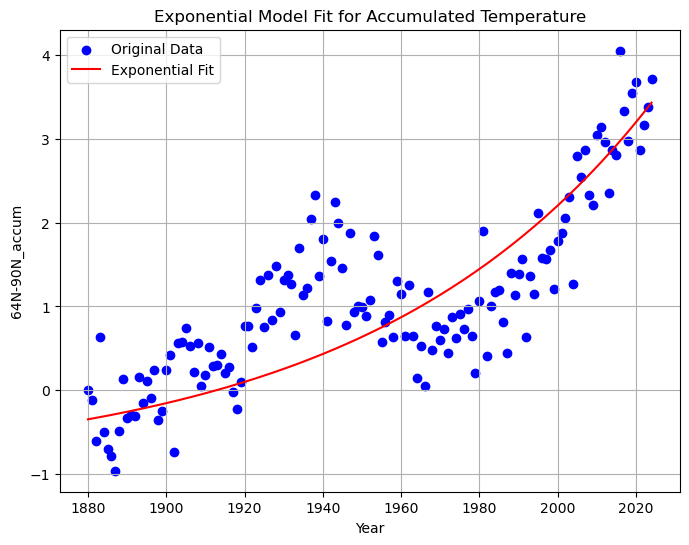

In [24]:
X = df[["Year"]]
y = df["64N-90N_accum"]

# Shift y to ensure all values are positive
shift_constant = abs(y.min()) + 1e-5  # Add a small constant to avoid zero
y_shifted = y + shift_constant

# Linearize the exponential model by taking the natural log of y_shifted
y_log = np.log(y_shifted)

# Fit the linear model
model = LinearRegression()
model.fit(X, y_log)

# Predict using the model
y_log_pred = model.predict(X)

# Convert back to exponential form
a = np.exp(model.intercept_)  # a = e^c
b = model.coef_[0]  # b remains the same

# Calculate predicted values in original scale (undo the shift)
y_pred = a * np.exp(b * X) - shift_constant

# Calculate R-squared value
r2 = r2_score(y, y_pred)

# Plot the original data and fitted exponential curve
plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(X, y, color="blue", label="Original Data")
plt.plot(X, y_pred, color="red", label="Exponential Fit")
plt.title("Exponential Model Fit for Accumulated Temperature")
plt.xlabel("Year")
plt.ylabel("64N-90N_accum")
plt.legend()
plt.grid(True)
plt.show()  # Ensure the plot is displayed

## Result Interpretation

### 1. Model Coefficients
The exponential model is of the form:
\[
y = a \cdot e^{bx}
\]
where:
- \( y \) is the accumulated temperature (`64N-90N_accum`).
- \( x \) is the year (`Year`).
- \( a \) and \( b \) are the coefficients of the model.

From the results:
- \( a = 3.2577 \times 10^{-12} \)
- \( b = 0.0138 \)

**Interpretation**:
- The **initial value** (\( a \)) is extremely small, suggesting that the accumulated temperature at year 0 is negligible.
- The **growth rate** (\( b \)) indicates that the accumulated temperature increases by approximately **1.38% per year** on average.

### 2. R-squared Value
The **R-squared value** is \( 0.5903 \), which means that **59.03%** of the variability in the accumulated temperature is explained by the exponential model.

**Interpretation**:
- The exponential model provides a **moderate fit** to the data, but there is still some unexplained variability.

### 3. Visual Assessment
The plot shows the original data points (blue) and the fitted exponential curve (red). The exponential curve captures the upward trend in accumulated temperature but may not fully align with the observed data in later years.

### 4. Recommendations
- Consider testing other models (e.g., quadratic, cubic, or logistic) to improve the fit.
- Investigate other factors that might influence the accumulated temperature.## Statistical Significance of the Exponential Model

### 1. P-values for Coefficients
- **Intercept (`const`)**: \( 7.0332 \times 10^{-10} \) (p < 0.05)
- **`Year` Coefficient**: \( 3.6518 \times 10^{-10} \) (p < 0.05)

**Interpretation**:
- Both the intercept and the `Year` coefficient are **statistically significant** at the \( 0.05 \) significance level.
- This means the exponential model is a valid representation of the relationship between `Year` and `64N-90N_accum`.

### 2. Implications for the Model
- The positive `Year` coefficient (\( b = 0.0138 \)) indicates that the accumulated temperature increases by approximately **1.38% per year** on average.
- The R-squared value (\( 0.5903 \)) suggests that the model explains about **59.03%** of the variability in the data.


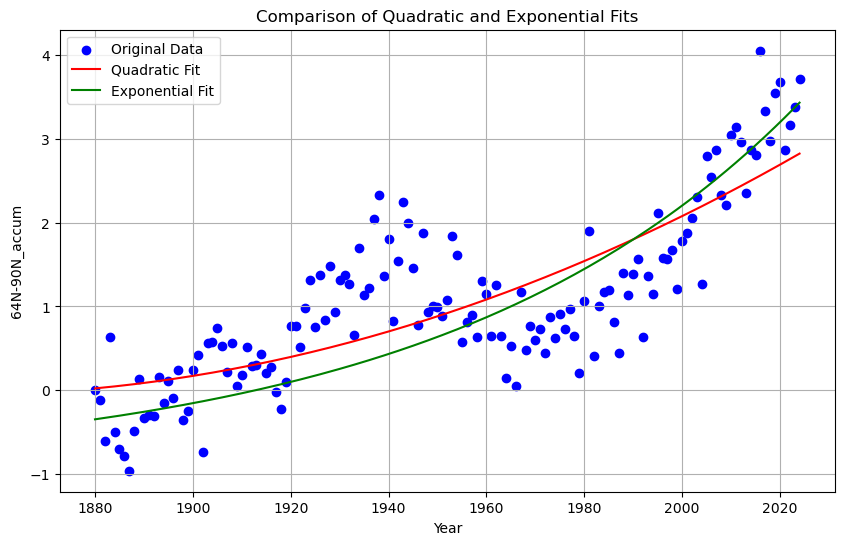

Quadratic Fit R-squared: 0.6366373952644182
Exponential Fit R-squared: 0.5963897046664572


In [26]:
##Compare the two fits
# Quadratic Fit
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
model_quad = LinearRegression()
model_quad.fit(X_poly, y)
y_pred_quad = model_quad.predict(X_poly)
r2_quad = r2_score(y, y_pred_quad)

# Exponential Fit
shift_constant = abs(y.min()) + 1e-5
y_shifted = y + shift_constant
y_log = np.log(y_shifted)
X_const = sm.add_constant(X)
model_exp = sm.OLS(y_log, X_const).fit()
y_log_pred = model_exp.predict(X_const)
y_pred_exp = np.exp(y_log_pred) - shift_constant
r2_exp = r2_score(y, y_pred_exp)

# Plot the original data and fitted curves
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color="blue", label="Original Data")
plt.plot(X, y_pred_quad, color="red", label="Quadratic Fit")
plt.plot(X, y_pred_exp, color="green", label="Exponential Fit")
plt.title("Comparison of Quadratic and Exponential Fits")
plt.xlabel("Year")
plt.ylabel("64N-90N_accum")
plt.legend()
plt.grid(True)
plt.show()

# Print R-squared values
print("Quadratic Fit R-squared:", r2_quad)
print("Exponential Fit R-squared:", r2_exp)

## Summary: Comparison of Quadratic and Exponential Fits

### Conclusion
- Arctic accumulated temperature is growing. 
- Both models provide valuable insights into the trend of accumulated temperature over time.
- The **quadratic model** suggests a potential slowing or reversal of the trend, while the **exponential model** suggests steady growth.
- The choice of model depends on the specific context and the desired interpretation of the data.
- A multilinear model may fit better but has limited interpreting power on the coefficients

In [ ]:
# Add a footer
st.markdown("---")
st.caption("Hope you had a fun read! Created by Meng JIANG")